<a href="https://colab.research.google.com/github/muhsupriazis/final-project/blob/main/clustering_data_9_period.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

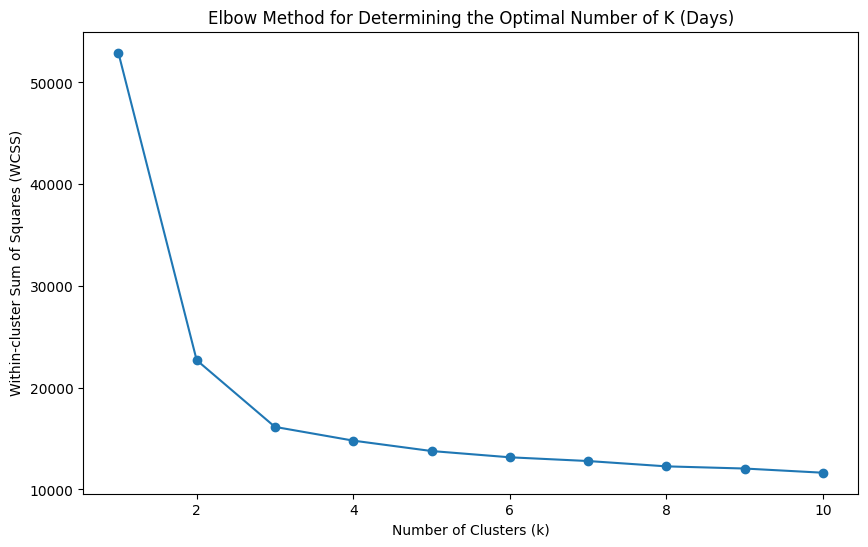

In [15]:
# Load the pivot table data
file_name = '/content/pivot_table_9period.xlsx'  # Ganti dengan nama file yang sesuai
pivot_df = pd.read_excel(file_name)

# Menyiapkan data untuk klasterisasi
# Mengambil kolom numeric untuk klasterisasi (misalnya traffic1, traffic2, dst.)
data_day = pivot_df.drop(columns=['longitude_latitude', 'period'])  # Drop non-numeric columns

# Handle missing values (NaN) before normalization
data_day = data_day.fillna(data_day.mean()) # Fill NaN with the mean of each column

# Normalisasi data
scaler = StandardScaler()
data_normalized_day = scaler.fit_transform(data_day)

# Menentukan jumlah klaster yang optimal menggunakan metode elbow
wcss_day = []
for i in range(1, 11):  # Coba 1 sampai 10 klaster
    kmeans_day = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_day.fit(data_normalized_day)
    wcss_day.append(kmeans_day.inertia_)

# Plot hasil metode elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss_day, marker='o')
plt.title('Elbow Method for Determining the Optimal Number of K (Days)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WCSS)')
plt.show()


In [16]:
# Klasterisasi menggunakan K-Means dengan k yang optimal
k_day = 2  # Misalnya k yang optimal setelah metode elbow
kmeans_day = KMeans(n_clusters=k_day, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_day = kmeans_day.fit_predict(data_normalized_day)

# Menambahkan hasil klasterisasi ke DataFrame
pivot_df['Cluster'] = clusters_day

In [17]:
from google.colab import files

# Simpan pivot table ke file Excel
output_file = '/content/table_cluster_3period.xlsx'
pivot_df.to_excel(output_file, index=False)

# Download file
files.download(output_file) # Use files from google.colab to download

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

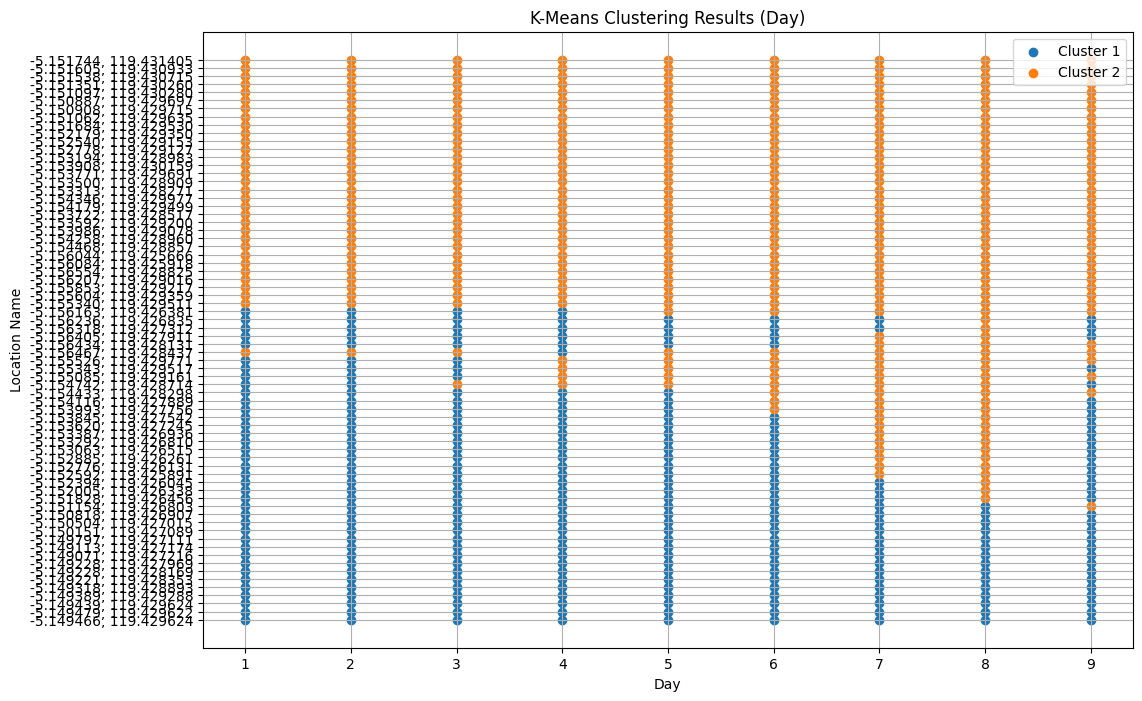

In [18]:

# Plot hasil klasterisasi
plt.figure(figsize=(12, 8))

# Warna berbeda untuk setiap klaster
for i in range(k_day):
    cluster_data_day = pivot_df[pivot_df['Cluster'] == i]
    plt.scatter(cluster_data_day['period'], cluster_data_day['longitude_latitude'], label=f'Cluster {i+1}')

plt.title('K-Means Clustering Results (Day)')
plt.xlabel('Day')
plt.ylabel('Location Name')
plt.legend()
plt.grid(True)
plt.show()